In [76]:
from glob import glob
import numpy as np 
import pandas as pd
from tqdm import tqdm

import cv2

import torch
import torch.nn as nn
from torch.utils import data
import copy

import torchvision
from torchvision import datasets, models, transforms
import accountant
import torch.multiprocessing as mp

import warnings
warnings.filterwarnings('ignore')

import argparse
import gc
import matplotlib.pyplot as plt
from tqdm.auto import tqdm

device = 'cuda'


torch.hub.set_dir('C:/Code/CS134/temp')

accountant.load_accountant('desc\\efficientnetB0.df', evaluate = True)

Downloading: "https://github.com/rwightman/gen-efficientnet-pytorch/archive/master.zip" to C:/Code/CS134/temp\master.zip


Image Size 124
Batch Size 24
Parent Mode None
Name efficientnetB0
Evaluate True


In [158]:
img_big = cv2.cvtColor(cv2.imread('grid1.jpg'), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(cv2.imread('grid2.jpg'), cv2.COLOR_BGR2RGB)
# img = cv2.resize(img, (124, 124))

In [159]:
img_big = img_big[250:900, 500:1400]

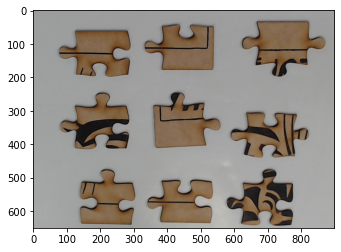

In [160]:
plt.imshow(img_big)

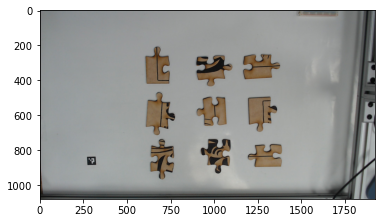

In [161]:
plt.imshow(img)

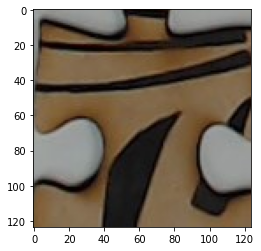

In [167]:
x = 635
y = 770
plt.imshow(img[y:y+124*1, x:x+124*1])

In [168]:
img = img[y:y+124*1, x:x+124*1]

In [169]:
chunks = []
n_chunk = 32
for i in np.linspace(0, img_big.shape[0] - 125, n_chunk).astype(int):
    for j in np.linspace(0, img_big.shape[1] - 125, n_chunk).astype(int):
        chunks.append(img_big[i:i+124, j:j+124, :].reshape(1, 124, 124, 3))
    

In [170]:
ref = torch.from_numpy(img[:124, :124, :].reshape(1, 124, 124, 3)).float().permute(0, 3, 1, 2).to(device)
ref_pred = accountant.model(ref)
scores = []
for chunk in (chunks):
    x = torch.from_numpy(chunk).float().permute(0, 3, 1, 2).to(device)
    pred = accountant.model(x)
    score = ((ref_pred - pred) ** 2).mean().cpu().detach().numpy()
    scores.append(score)

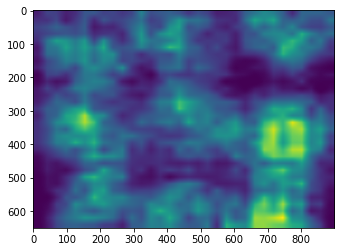

In [171]:
plt.imshow((np.max(scores) - cv2.resize(np.array(scores).reshape(n_chunk, n_chunk), (img_big.shape[1], img_big.shape[0])))**3)

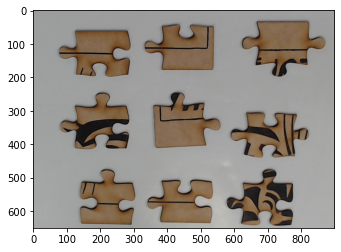

In [172]:
plt.imshow(img_big)

In [173]:
np.argmin(scores)

986

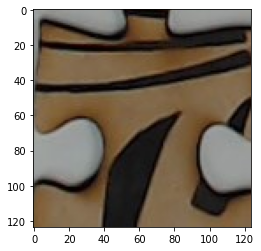

In [174]:
plt.imshow(img[:124, :124])

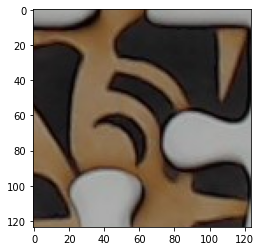

In [177]:
plt.imshow(chunks[986][0])

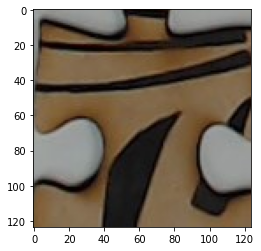

In [178]:
plt.imshow(img)

In [157]:
np.linspace(100, img_big.shape[0] - 125, n_chunk).astype(int)

array([100, 113, 127, 141, 154, 168, 182, 195, 209, 223, 237, 250, 264,
       278, 291, 305, 319, 333, 346, 360, 374, 387, 401, 415, 429, 442,
       456, 470, 483, 497, 511, 525])